In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
desc = pd.read_csv('music_numeric.csv',index_col=0,usecols=['artist_name','track_name'])

In [67]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [36]:
features = pd.read_csv('features_minmax.csv',index_col=0)
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,genre_A Capella,...,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.368,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.390,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
labels = pd.read_csv('labels.csv',index_col=0)
labels.head()

,target
0,0
1,0
2,0
3,0
4,0


In [38]:
clustering_kmeans = KMeans(n_clusters=5)
features['cluster'] = clustering_kmeans.fit_predict(features)

In [39]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,genre_A Capella,...,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,cluster
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.368,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.390,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [40]:
reduced_data = PCA(n_components=2).fit_transform(features)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

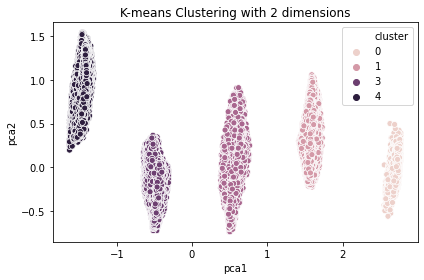

In [93]:
sns_plot = sns.scatterplot(x="pca1", y="pca2", hue=features['cluster'], data=results).get_figure()
sns_plot.savefig("kmeans_cluster.png")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

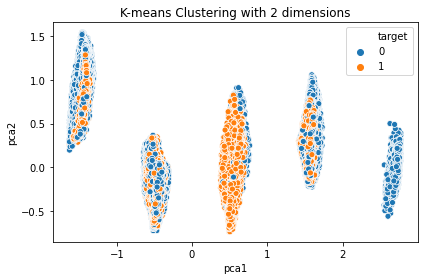

In [94]:
sns_plot = sns.scatterplot(x="pca1", y="pca2", hue=labels['target'], data=results).get_figure()
sns_plot.savefig("kmeans_cluster_target.png")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [43]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,genre_A Capella,...,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,cluster
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.368,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.390,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [44]:
combined = features
combined['target'] = labels['target']

In [45]:
combined.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,genre_A Capella,...,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,cluster,target
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.368,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.390,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [46]:
c0 = combined[combined['cluster']==0]
c1 = combined[combined['cluster']==1]
c2 = combined[combined['cluster']==2]
c3 = combined[combined['cluster']==3]
c4 = combined[combined['cluster']==4]

In [47]:
c0 = c0.drop(['cluster'],axis=1)
c1 = c1.drop(['cluster'],axis=1)
c2 = c2.drop(['cluster'],axis=1)
c3 = c3.drop(['cluster'],axis=1)
c4 = c4.drop(['cluster'],axis=1)

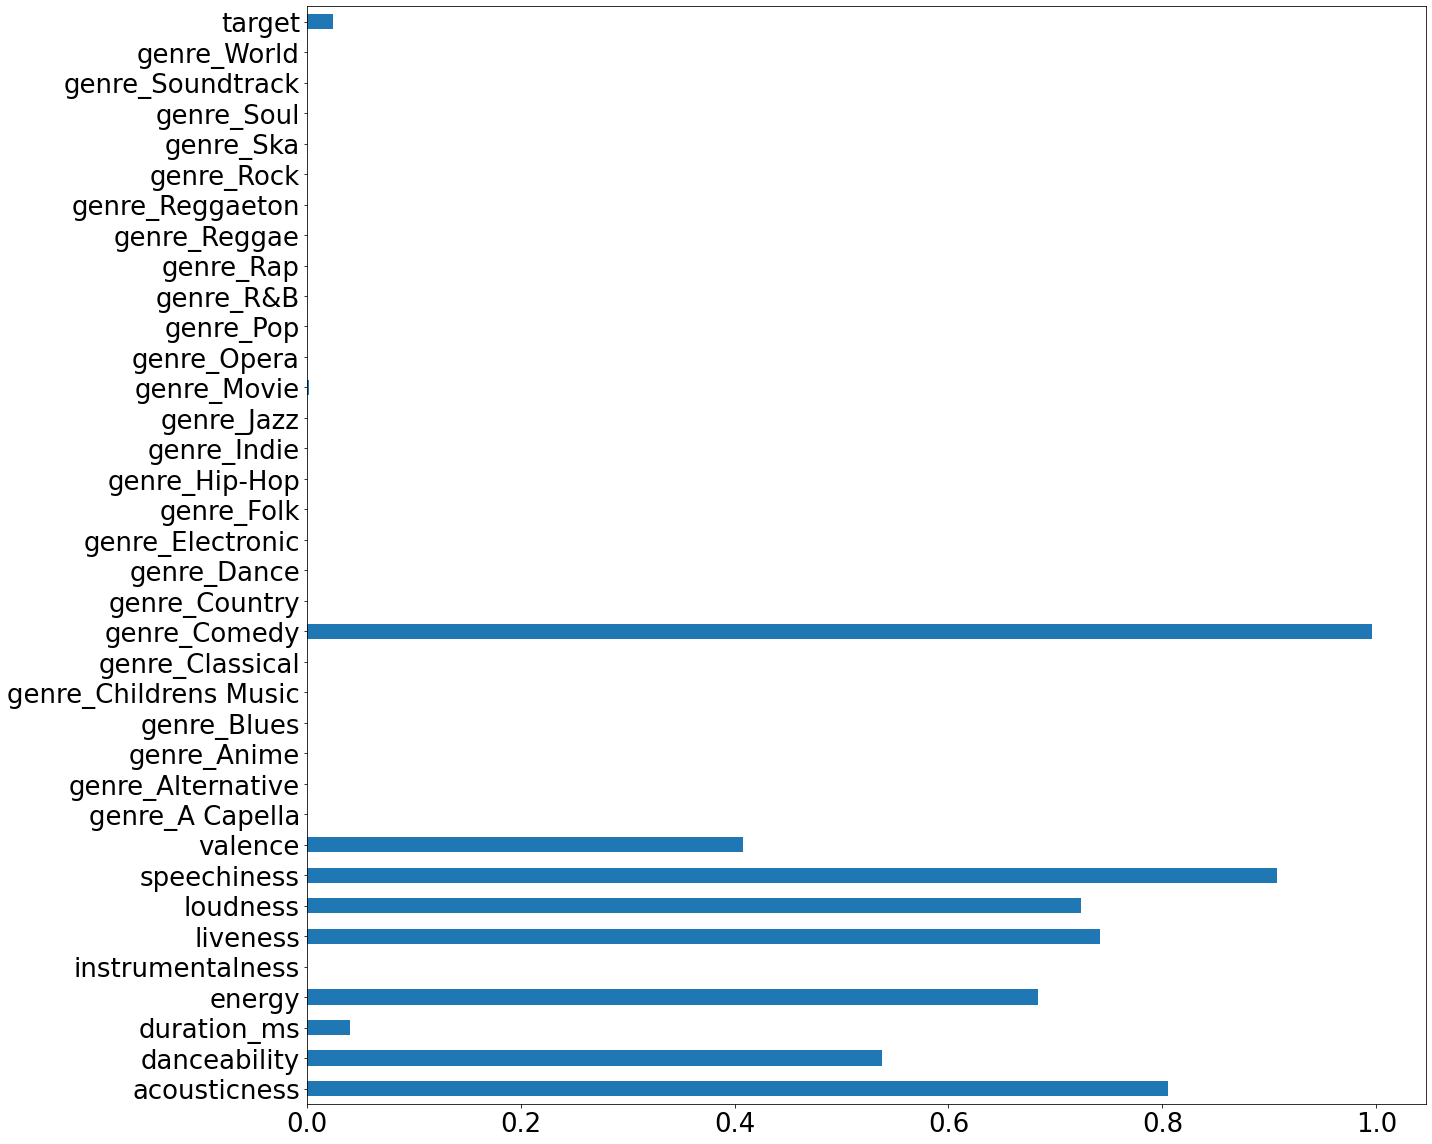

In [68]:
c0fig = c0.mean().plot(kind='barh', figsize=(20, 16), fontsize=26).get_figure()
c0fig.savefig('c0_bar.png')

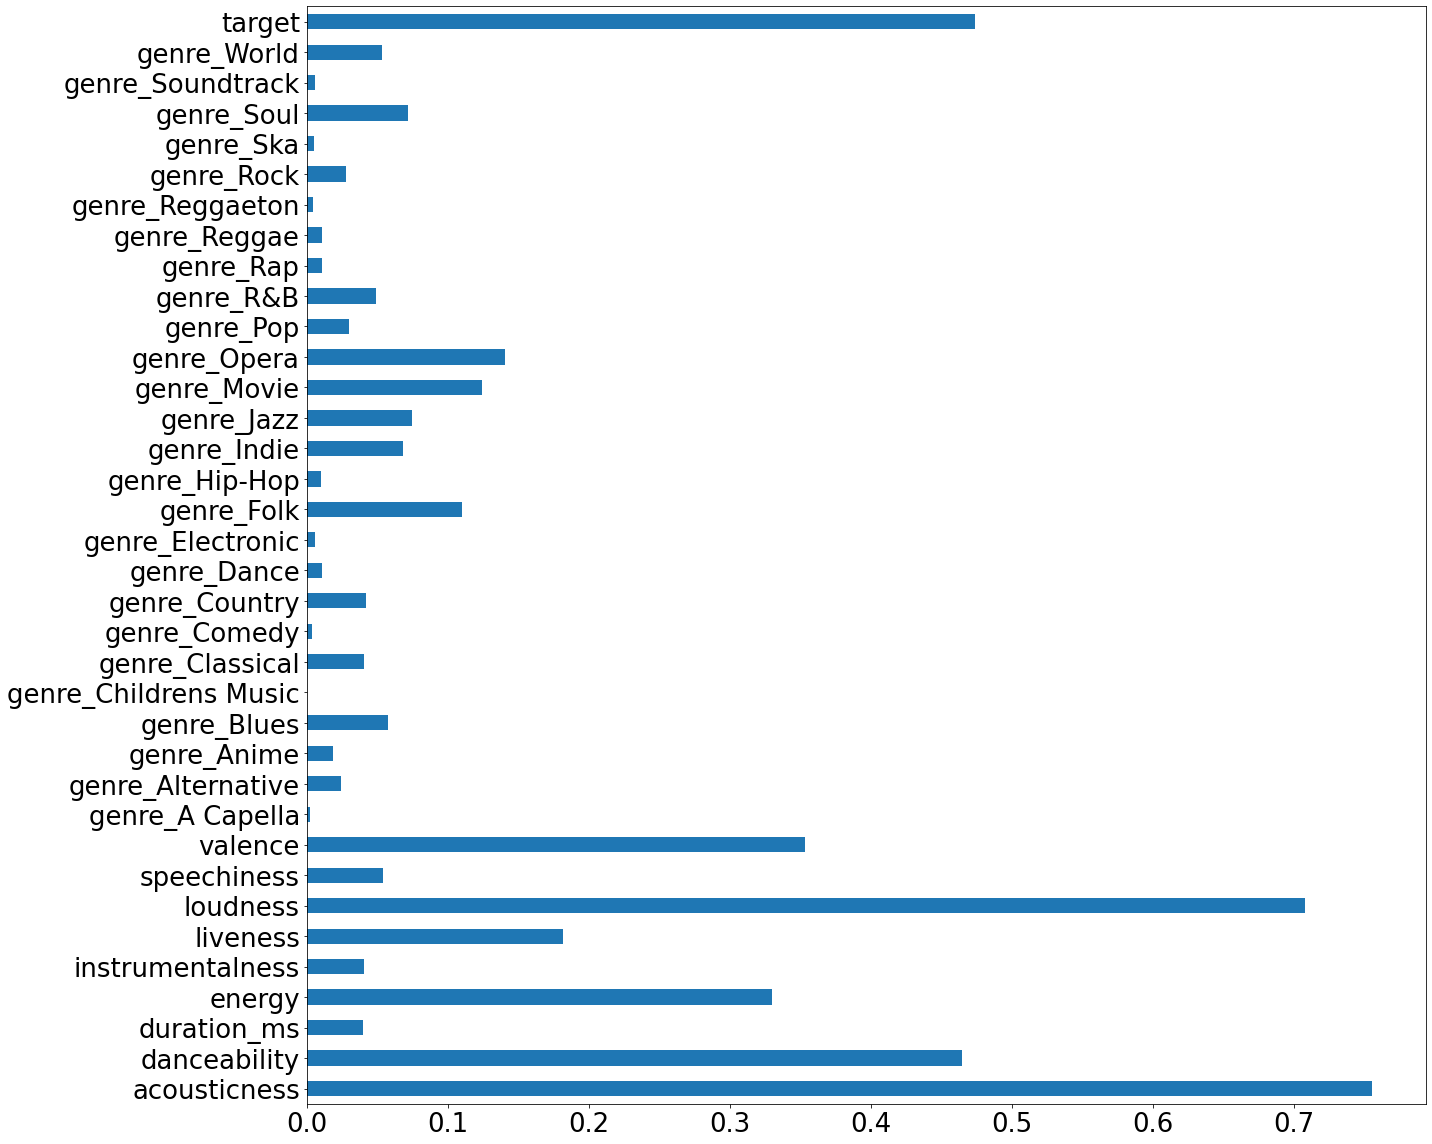

In [69]:
c1fig = c1.mean().plot(kind='barh', figsize=(20, 16), fontsize=26).get_figure()
c1fig.savefig('c1_bar.png')

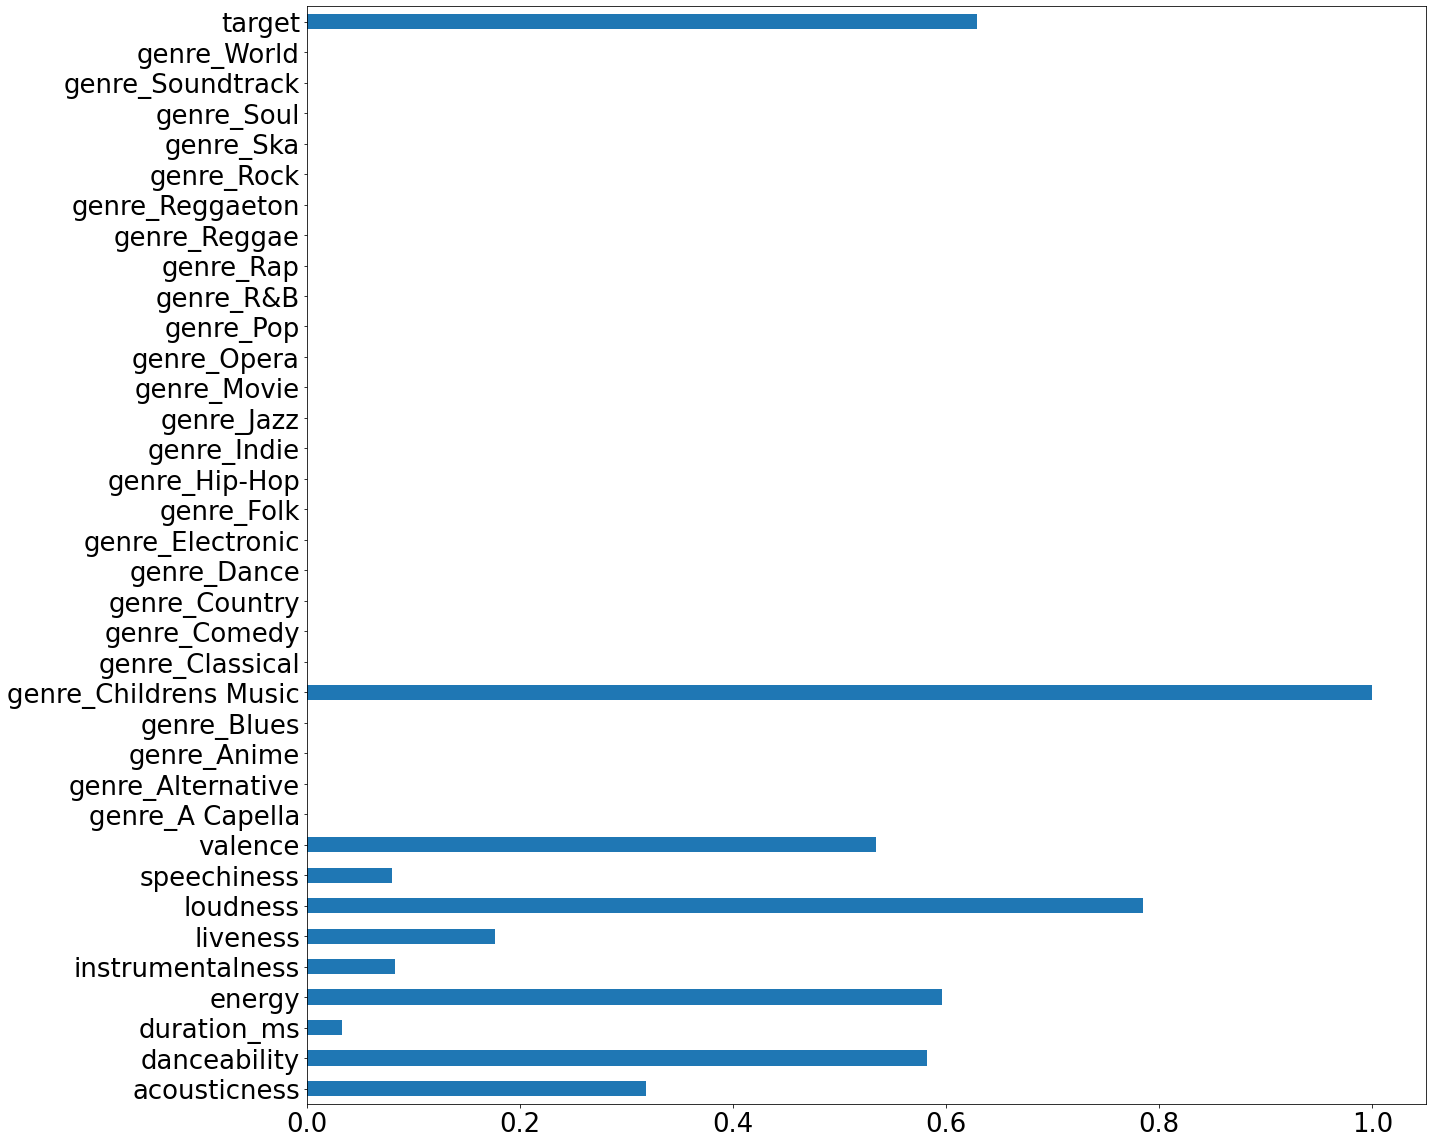

In [70]:
c2fig = c2.mean().plot(kind='barh', figsize=(20, 16), fontsize=26).get_figure()
c2fig.savefig('c2_bar.png')

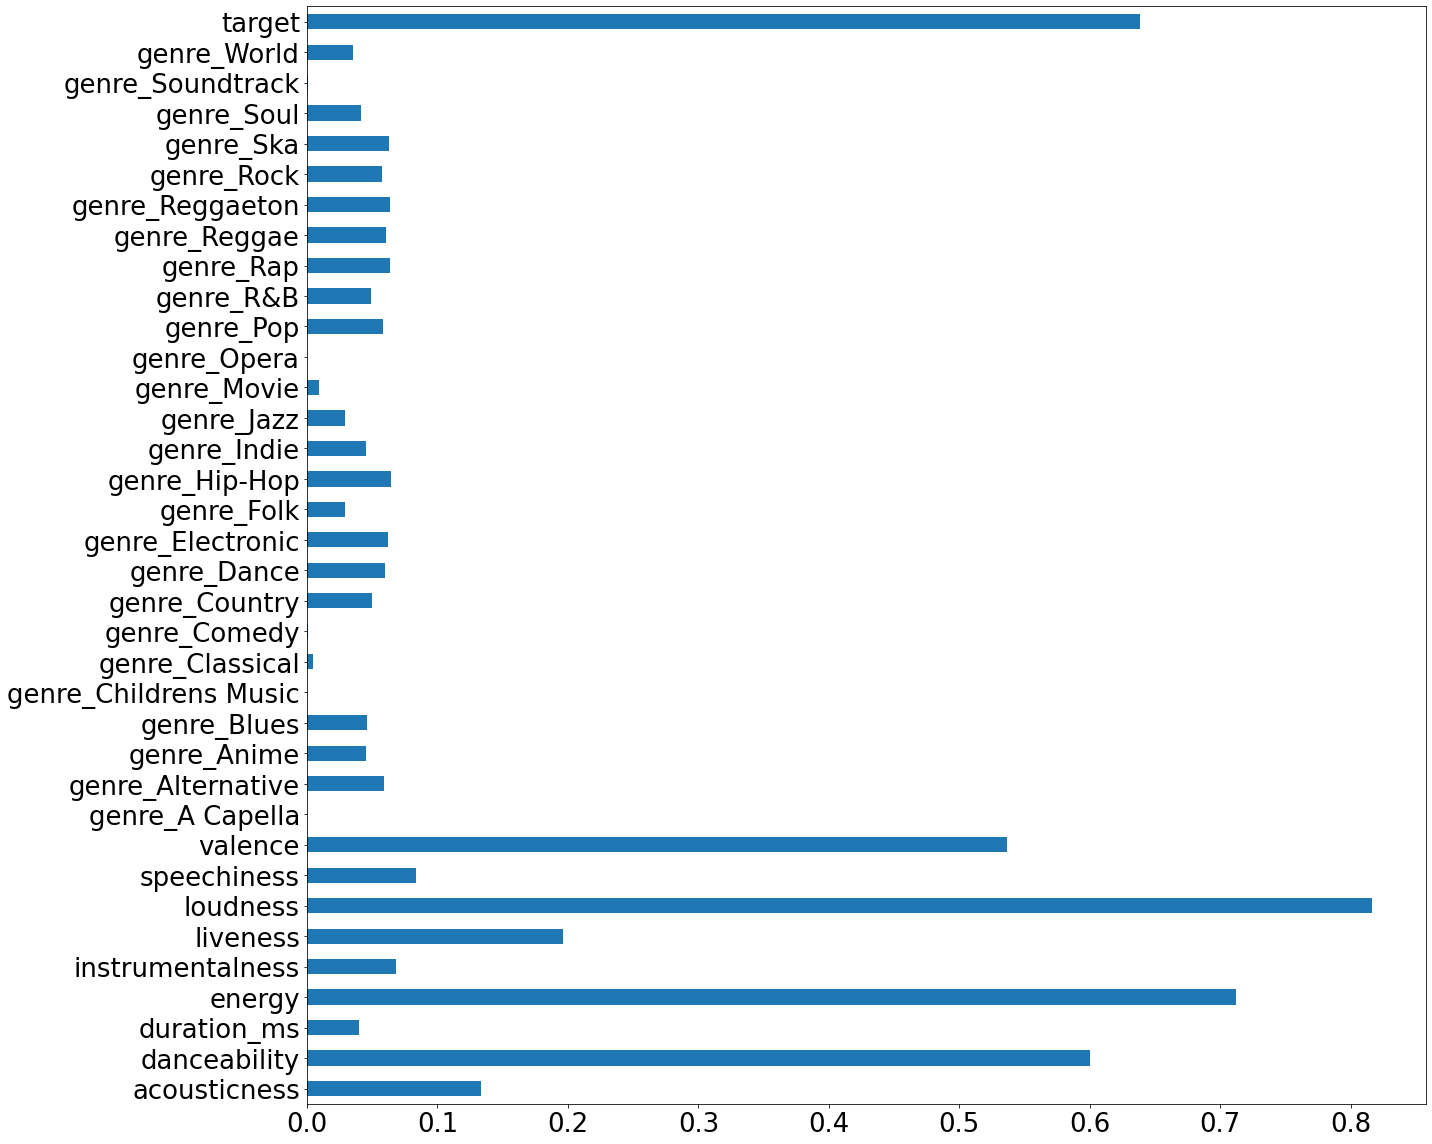

In [71]:
c3fig = c3.mean().plot(kind='barh', figsize=(20, 16), fontsize=26).get_figure()
c3fig.savefig('c3_bar.png')

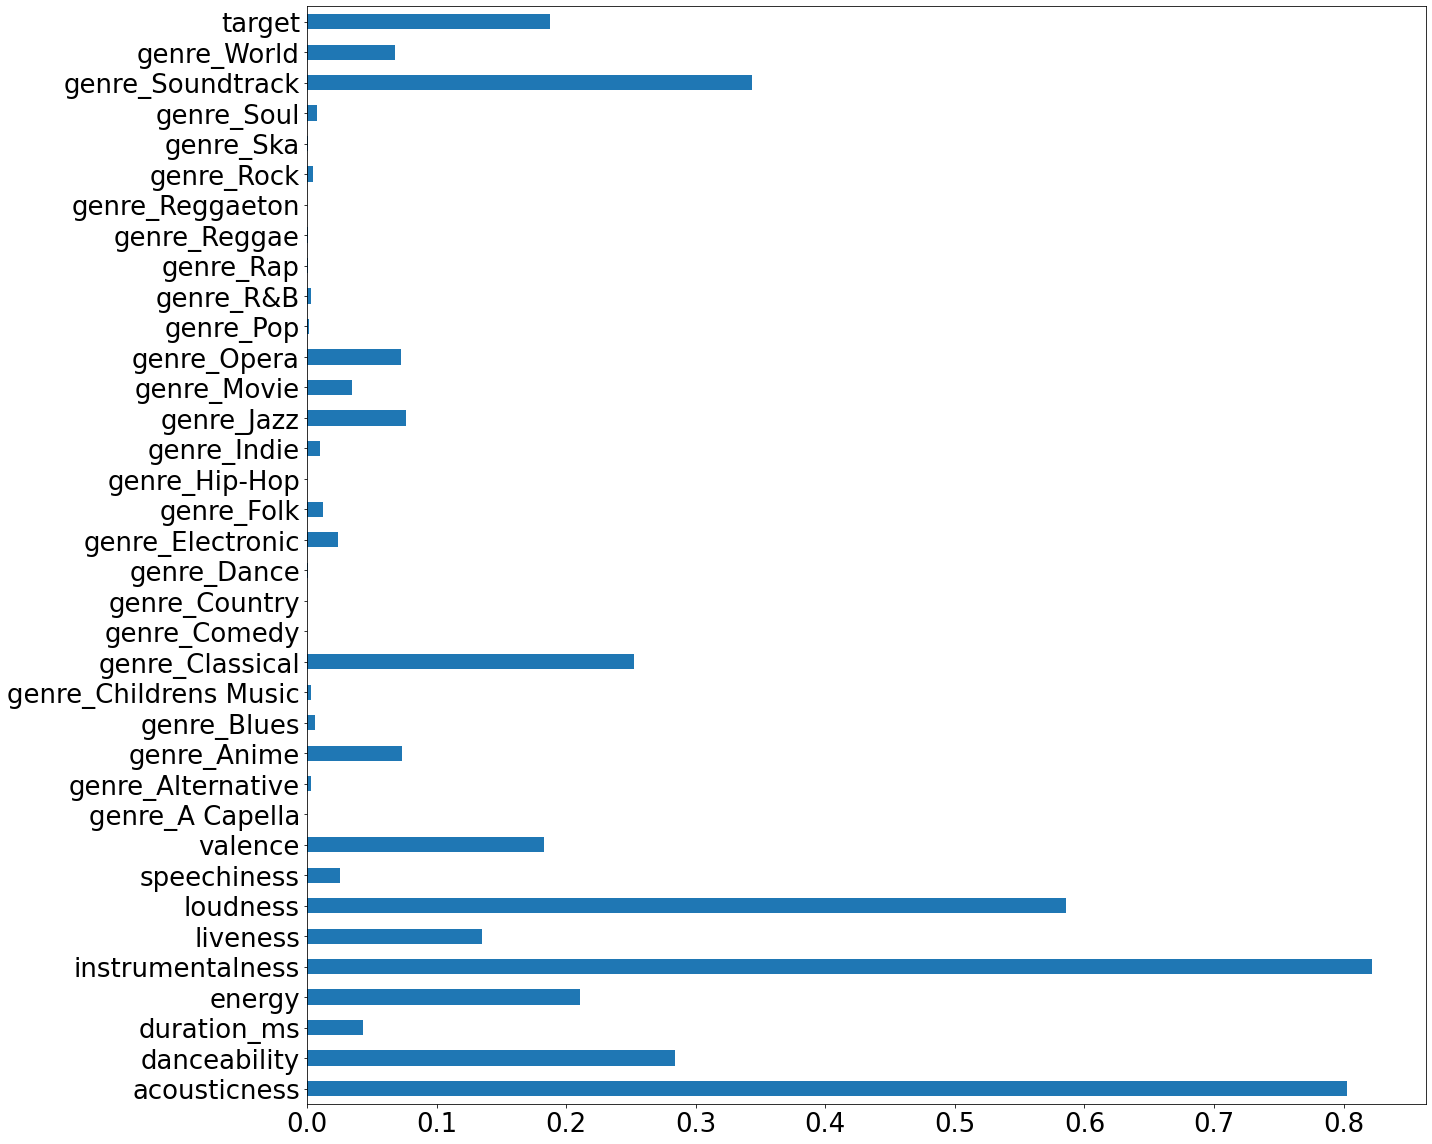

In [73]:
c4fig = c4.mean().plot(kind='barh', figsize=(20, 16), fontsize=26).get_figure()
c4fig.savefig('c4_bar.png')

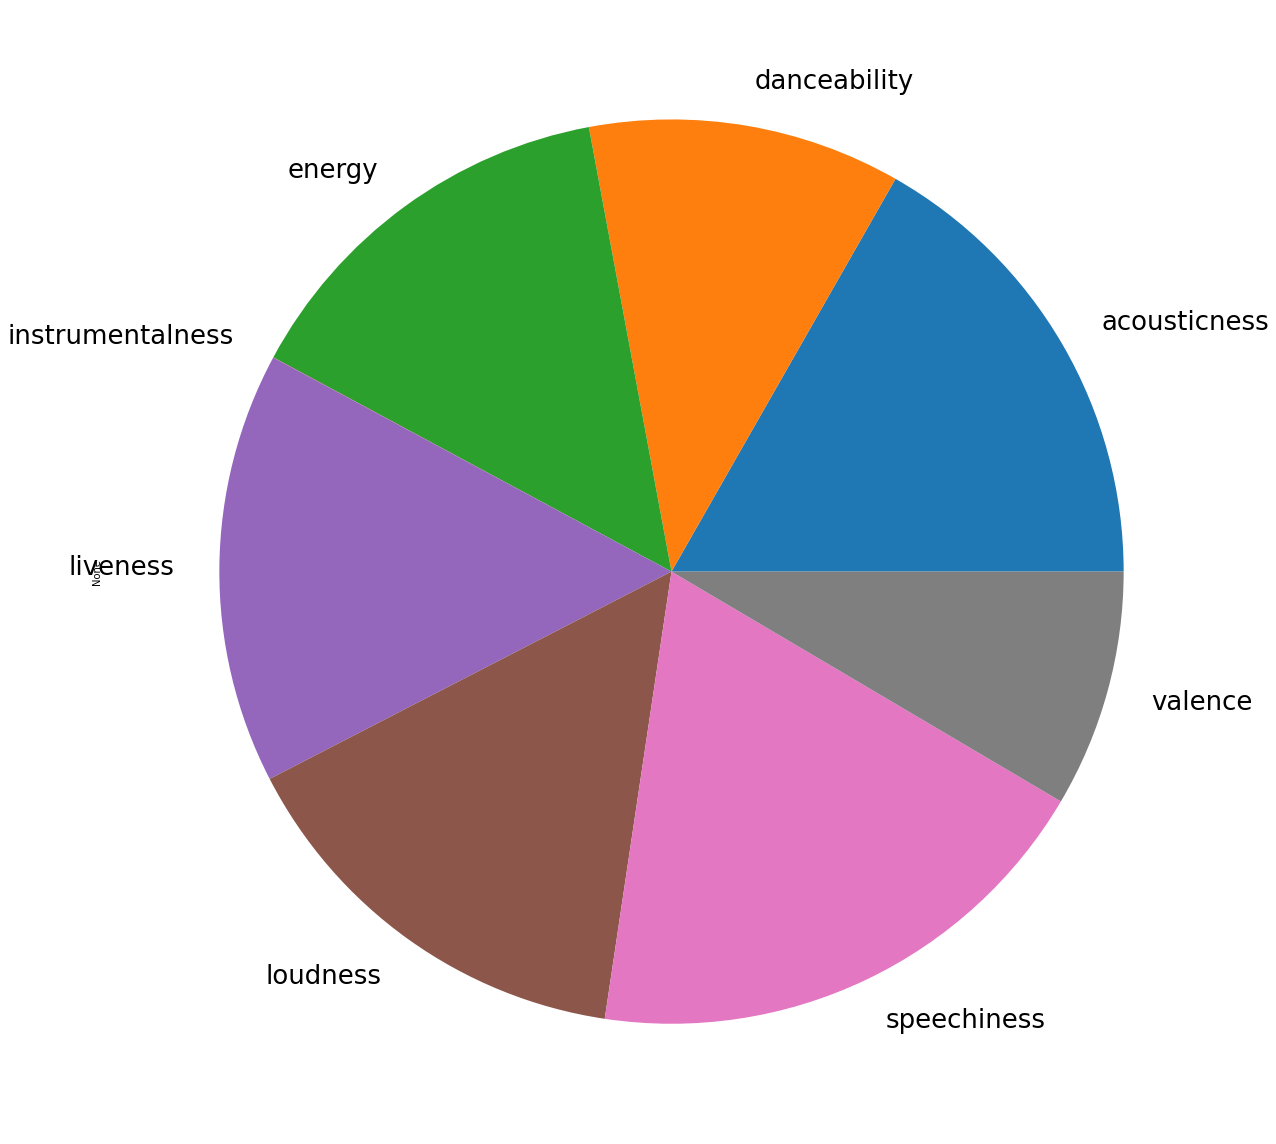

In [78]:
c0f = c0.drop(['genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Childrens Music', 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', 'genre_World', 'target', 'duration_ms'],axis=1)
c0ffig = c0f.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c0ffig.savefig('c0_pie.png')

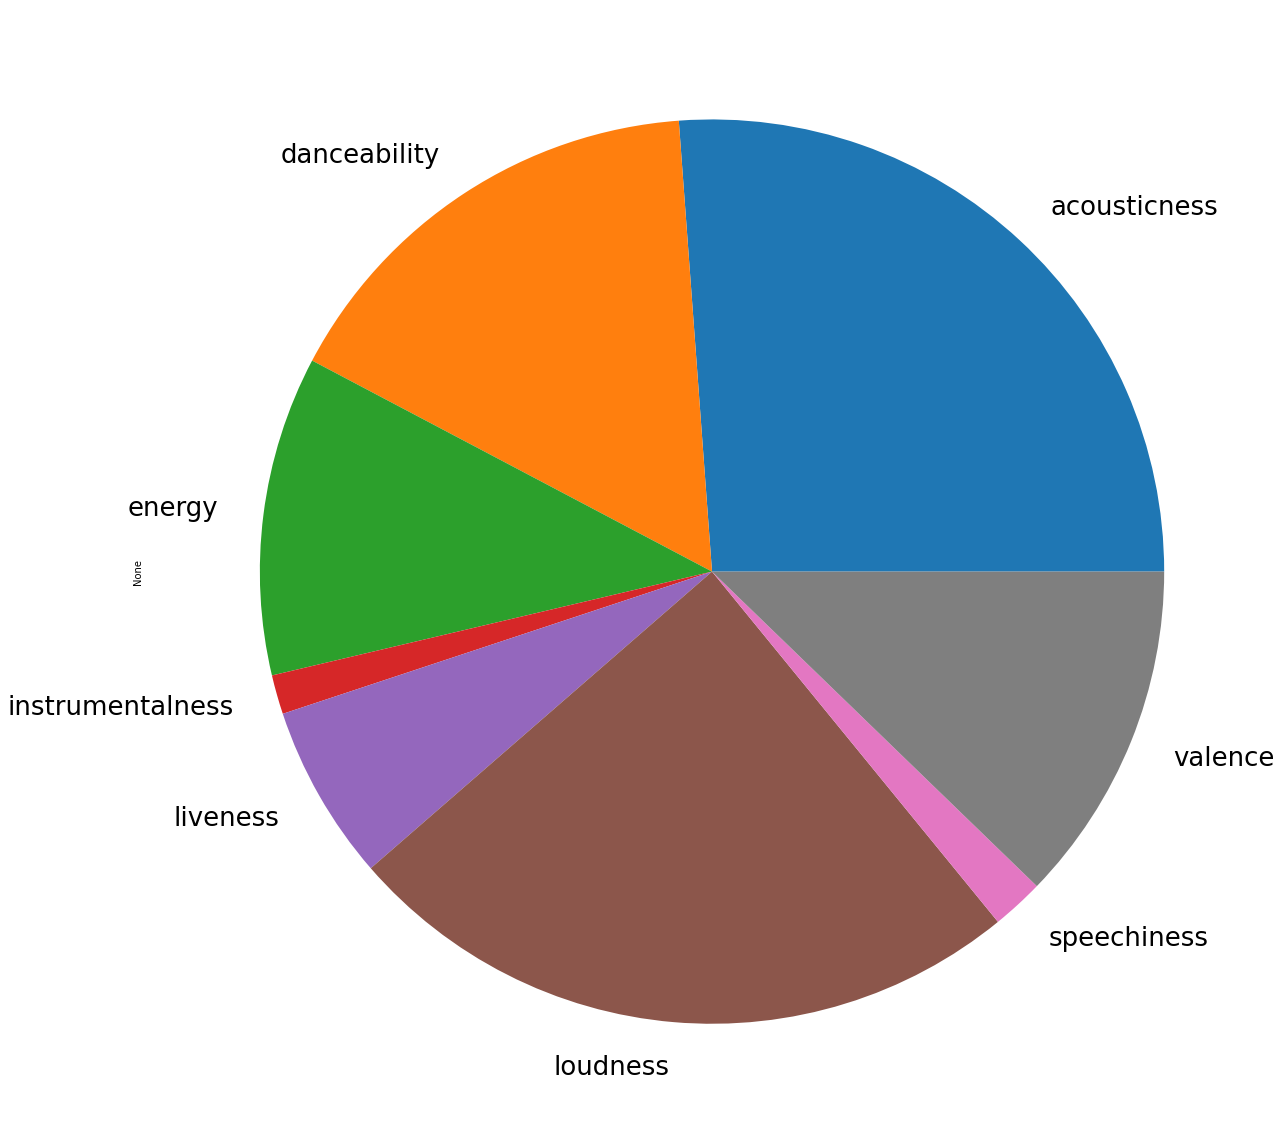

In [83]:
c1f = c1.drop(['genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Childrens Music', 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', 'genre_World', 'target', 'duration_ms'],axis=1)
c1ffig = c1f.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c1ffig.savefig('c1_pie.png')

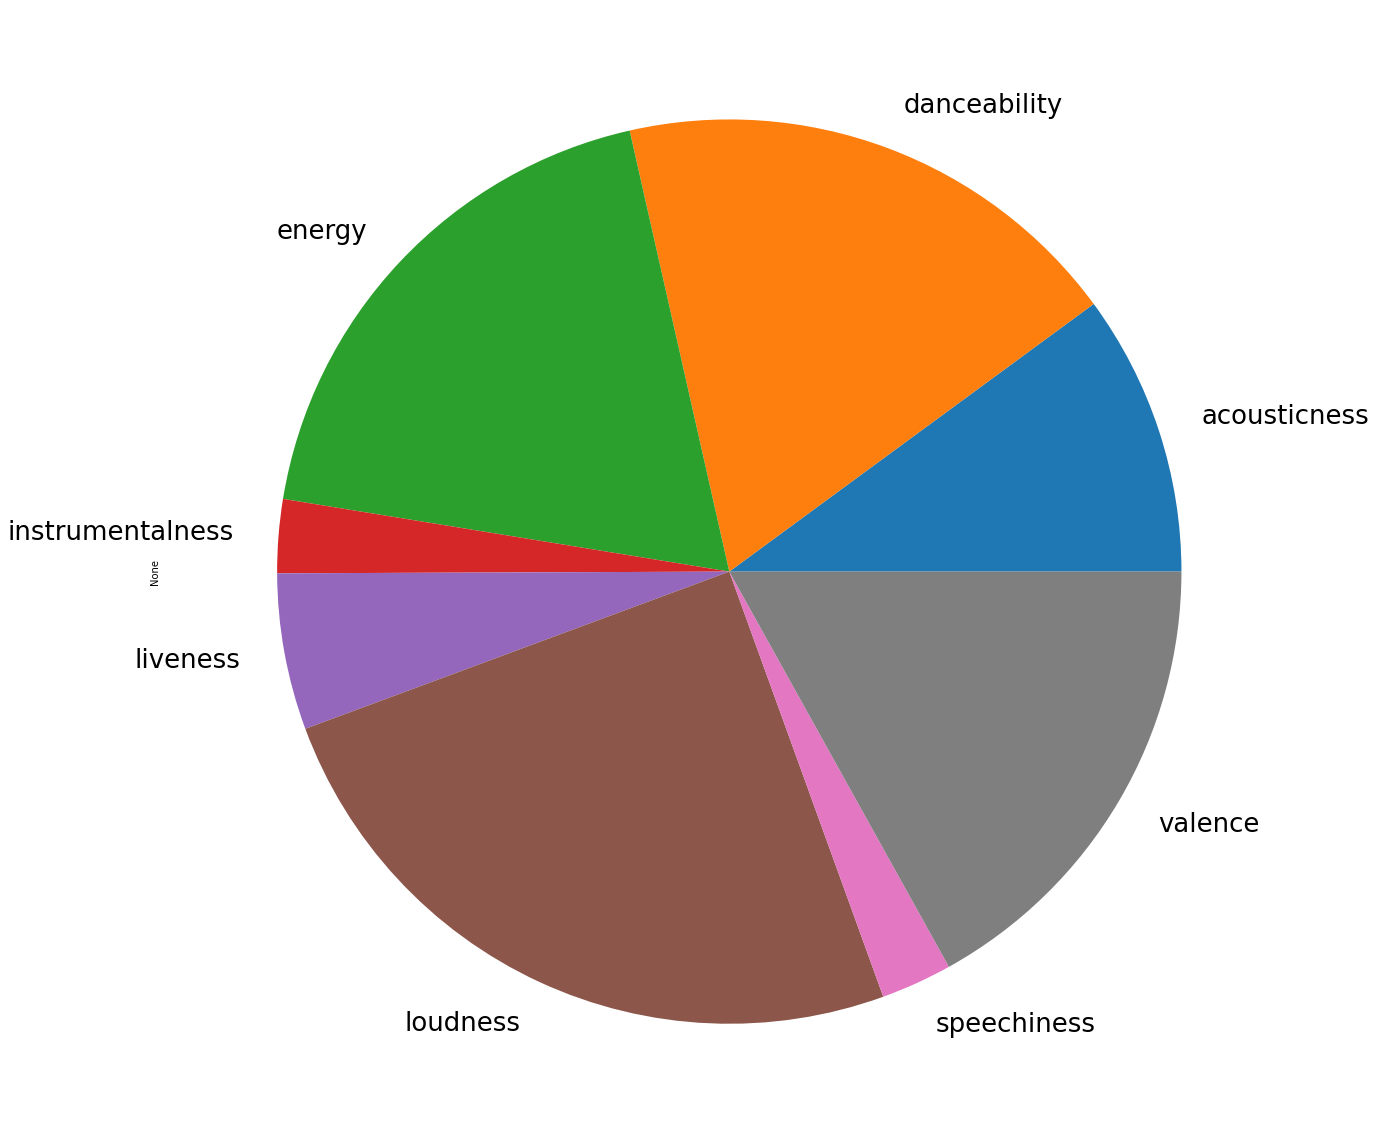

In [80]:
c2f = c2.drop(['genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Childrens Music', 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', 'genre_World', 'target', 'duration_ms'],axis=1)
c2ffig = c2f.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c2ffig.savefig('c2_pie.png')

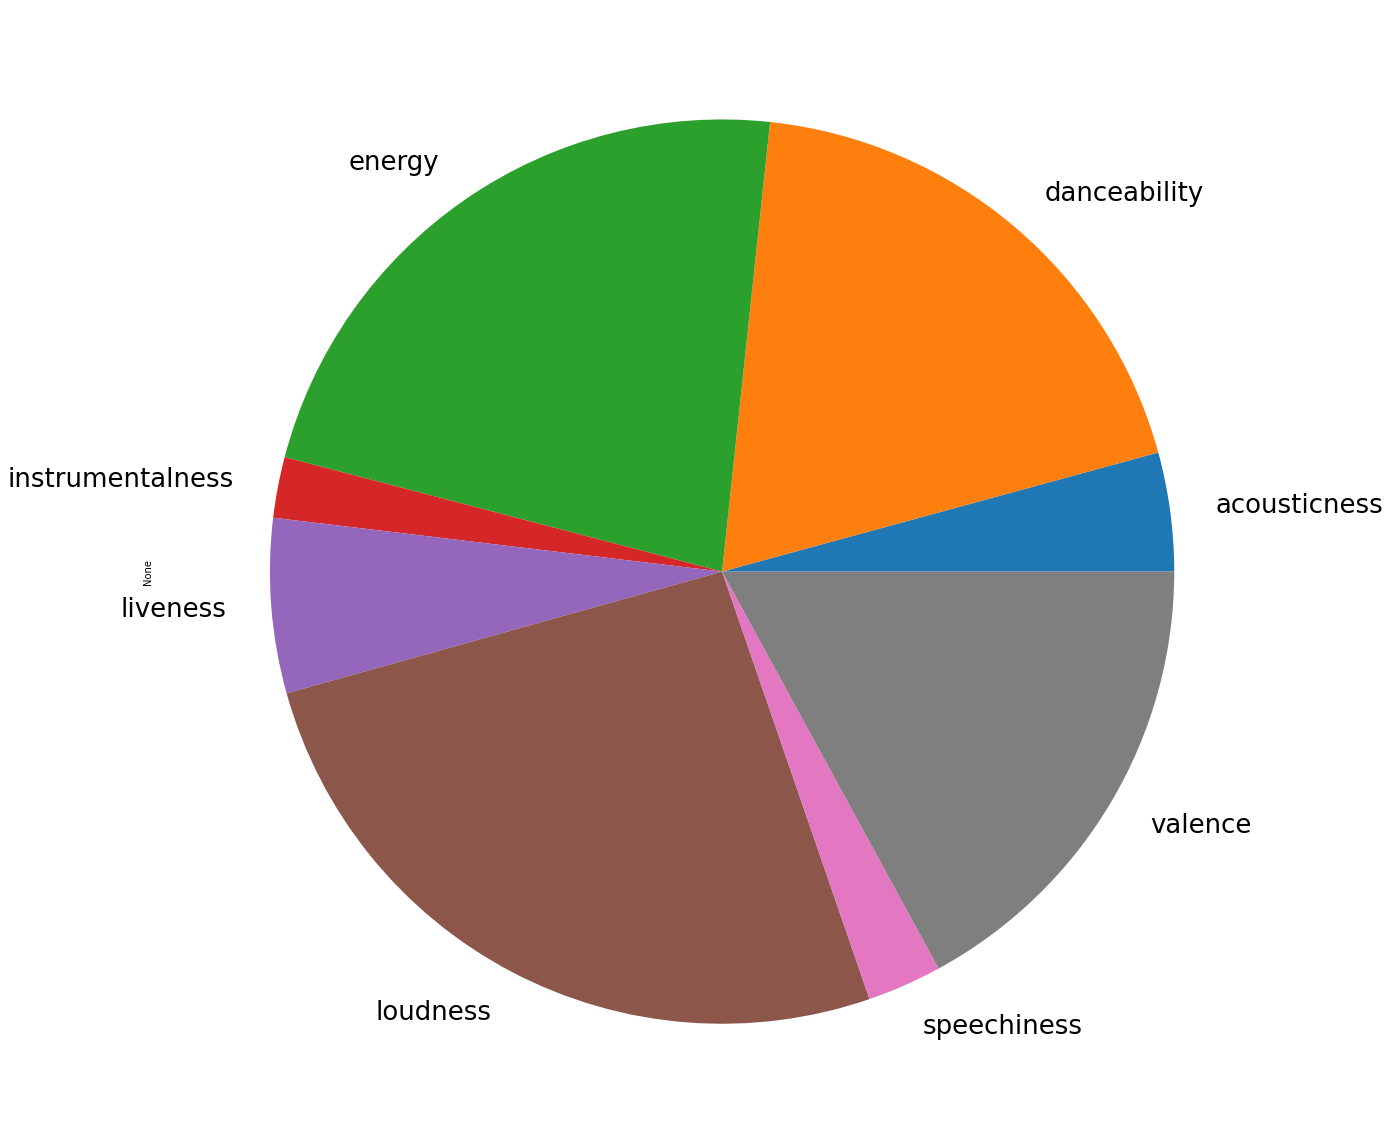

In [82]:
c3f = c3.drop(['genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Childrens Music', 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', 'genre_World', 'target', 'duration_ms'],axis=1)
c3ffig = c3f.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c3ffig.savefig('c3_pie.png')

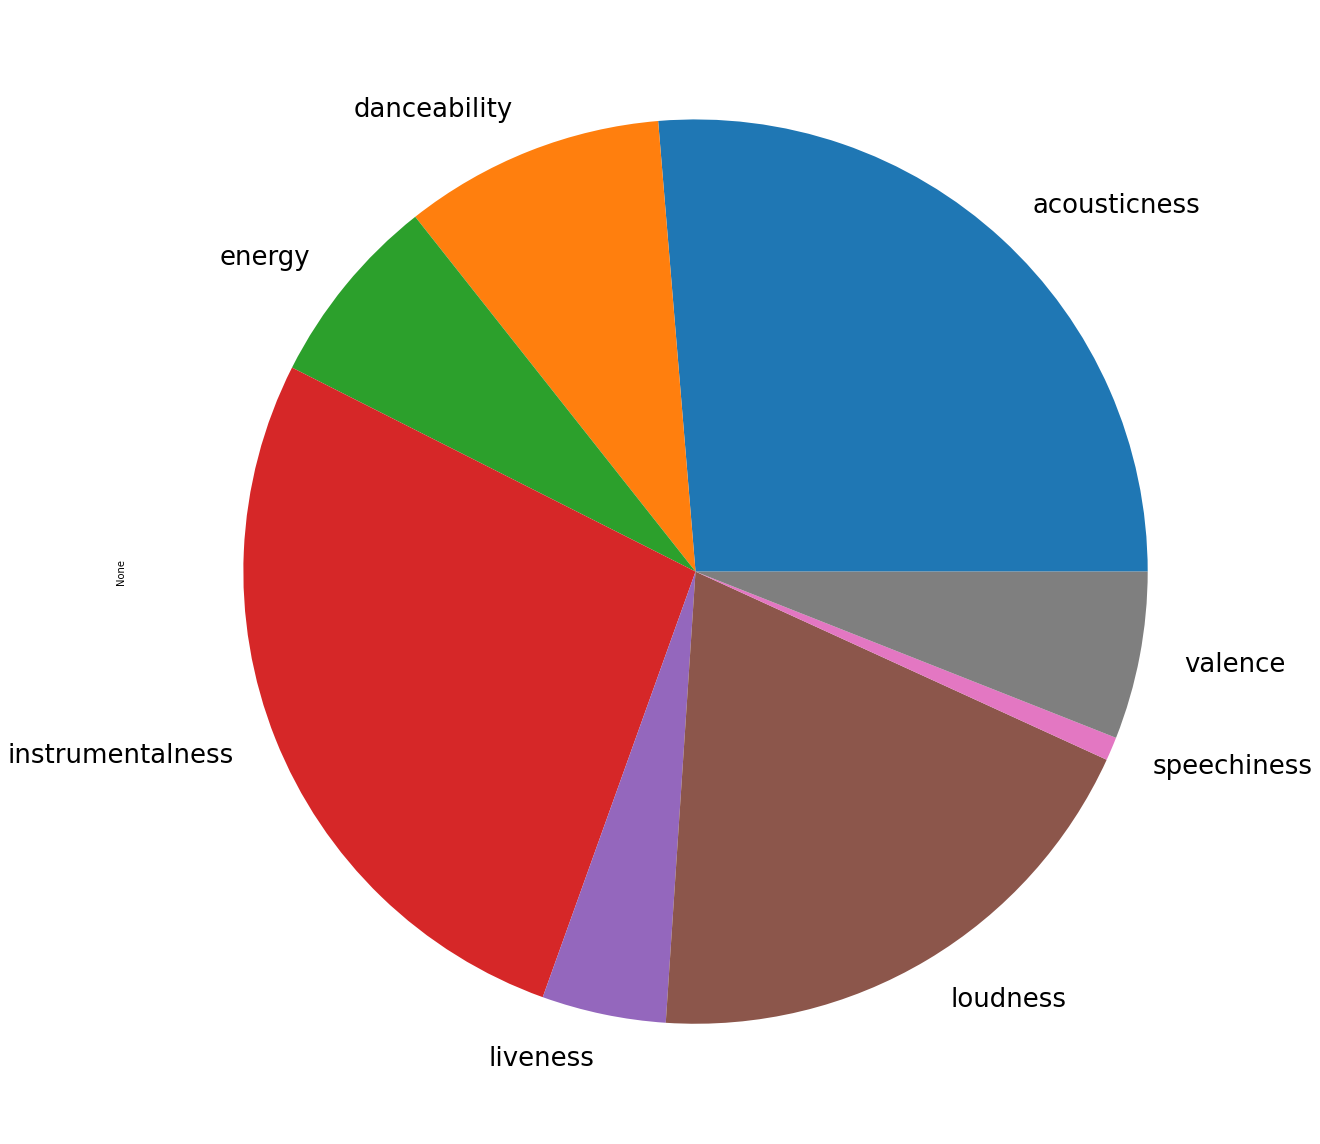

In [84]:
c4f = c4.drop(['genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Childrens Music', 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', 'genre_World', 'target', 'duration_ms'],axis=1)
c4ffig = c4f.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c4ffig.savefig('c4_pie.png')

In [85]:
c0.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Childrens Music', 'genre_Classical', 'genre_Comedy',
       'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk',
       'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie',
       'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae',
       'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul',
       'genre_Soundtrack', 'genre_World', 'target'],
      dtype='object')

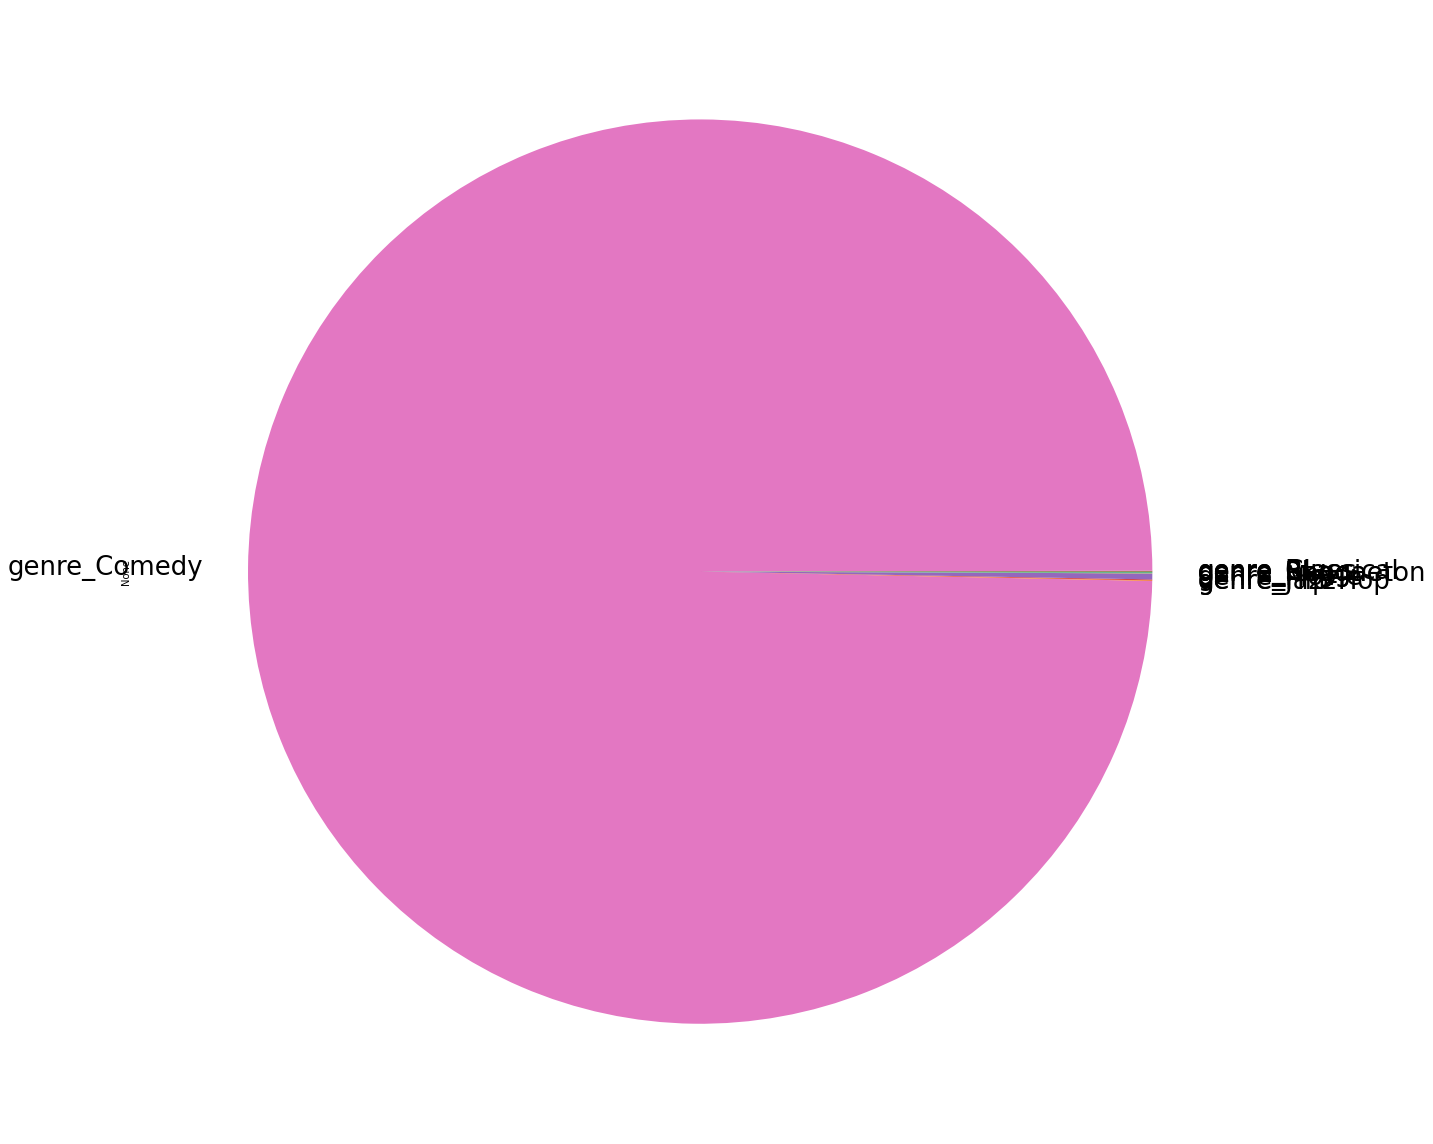

In [86]:
c0g = c0.drop(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'target'],axis=1)
c0gfig = c0g.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c0gfig.savefig('c0_pie_genre.png')

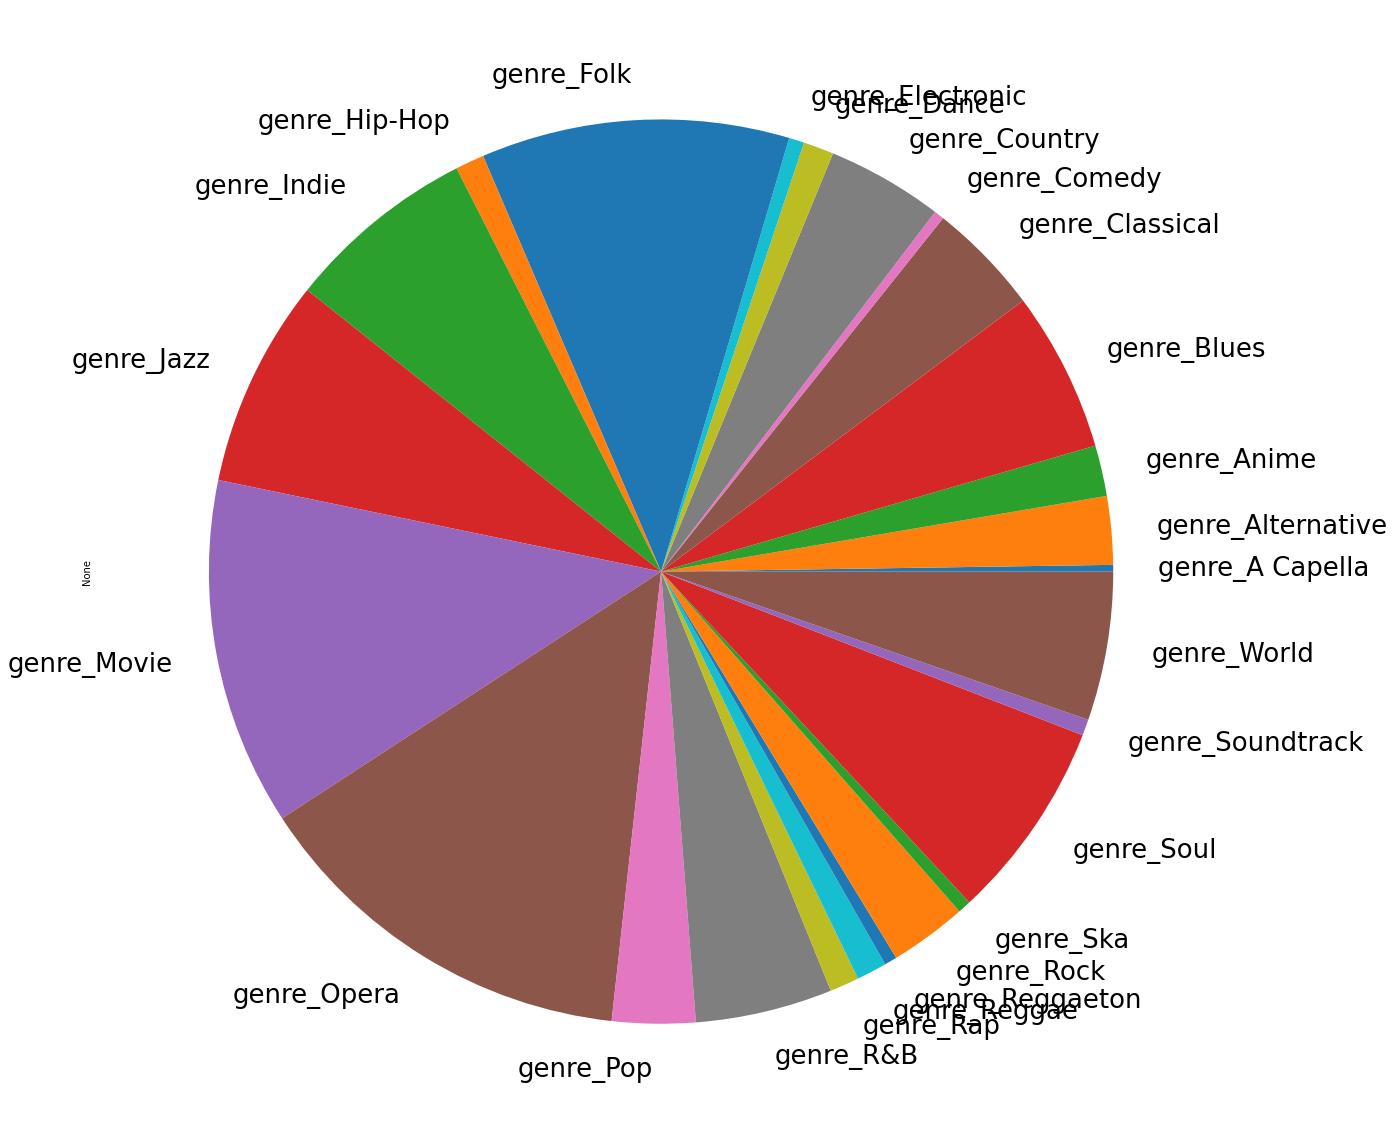

In [87]:
c1g = c1.drop(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'target'],axis=1)
c1gfig = c1g.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c1gfig.savefig('c1_pie_genre.png')

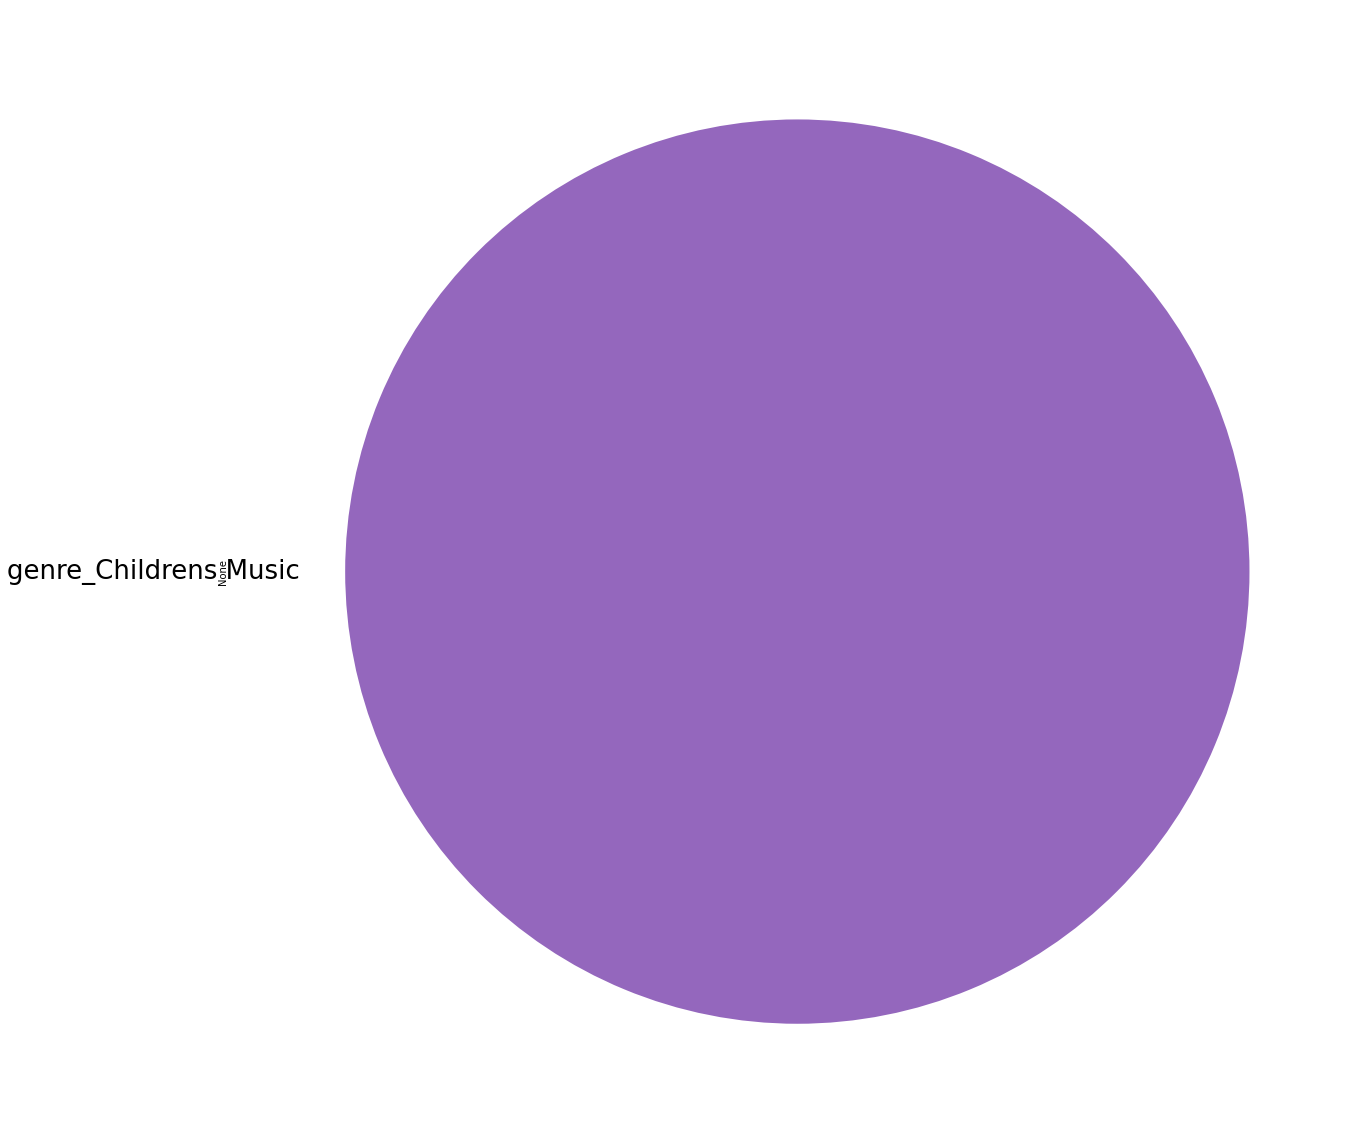

In [88]:
c2g = c2.drop(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'target'],axis=1)
c2gfig = c2g.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c2gfig.savefig('c2_pie_genre.png')

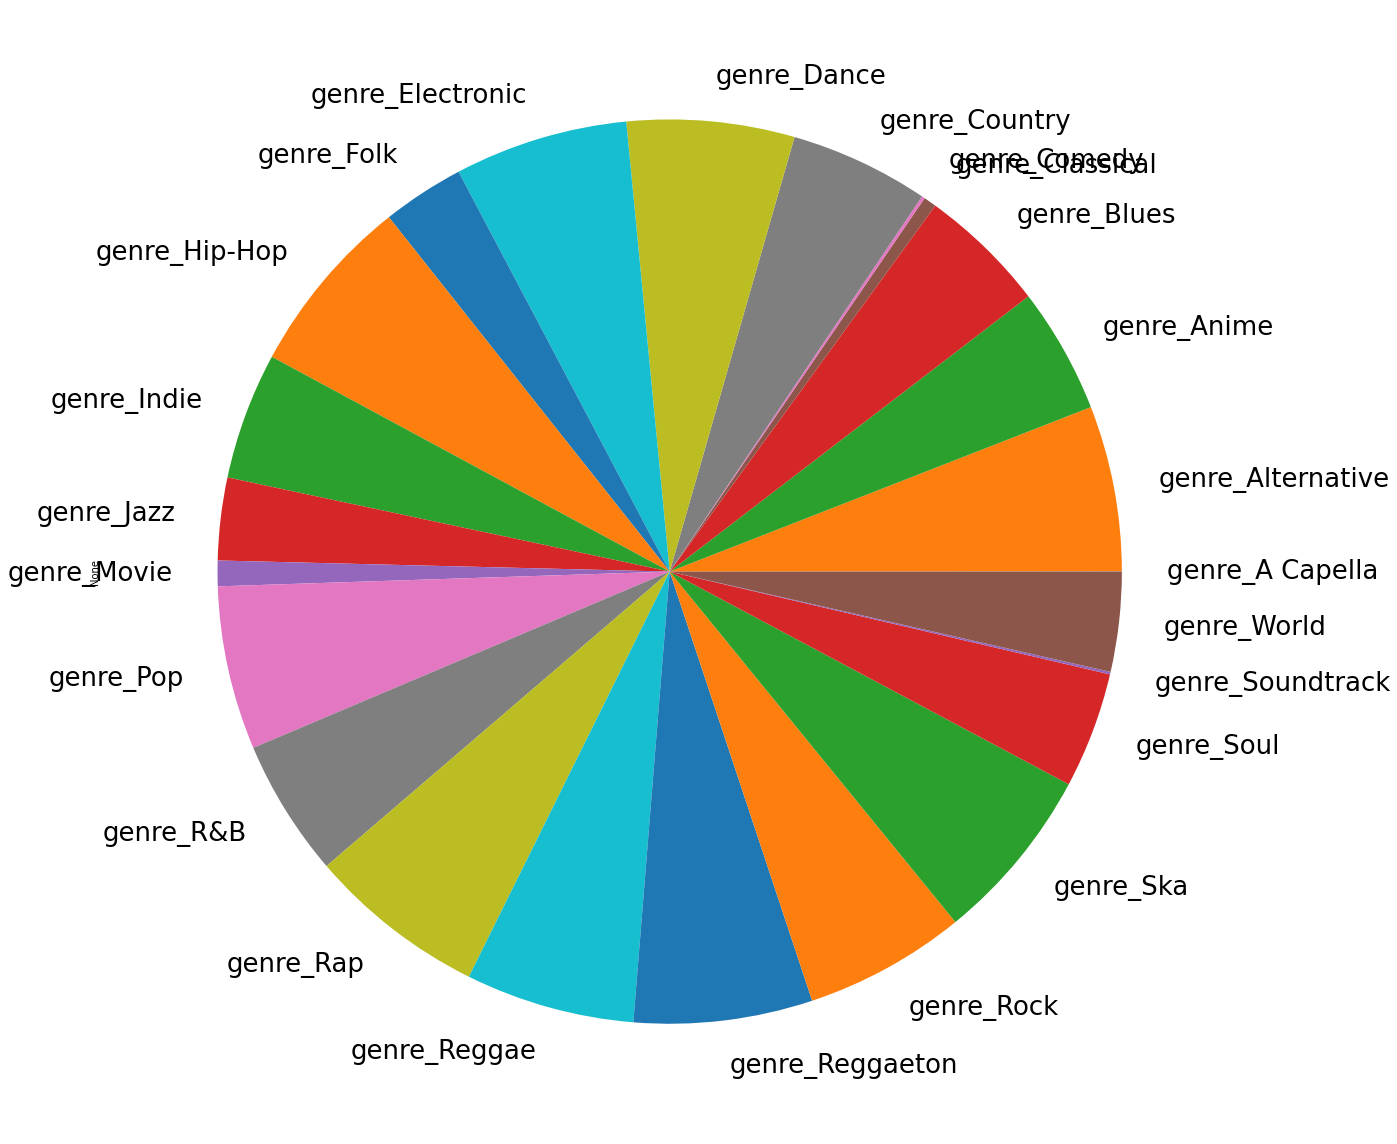

In [89]:
c3g = c3.drop(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'target'],axis=1)
c3gfig = c3g.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c3gfig.savefig('c3_pie_genre.png')

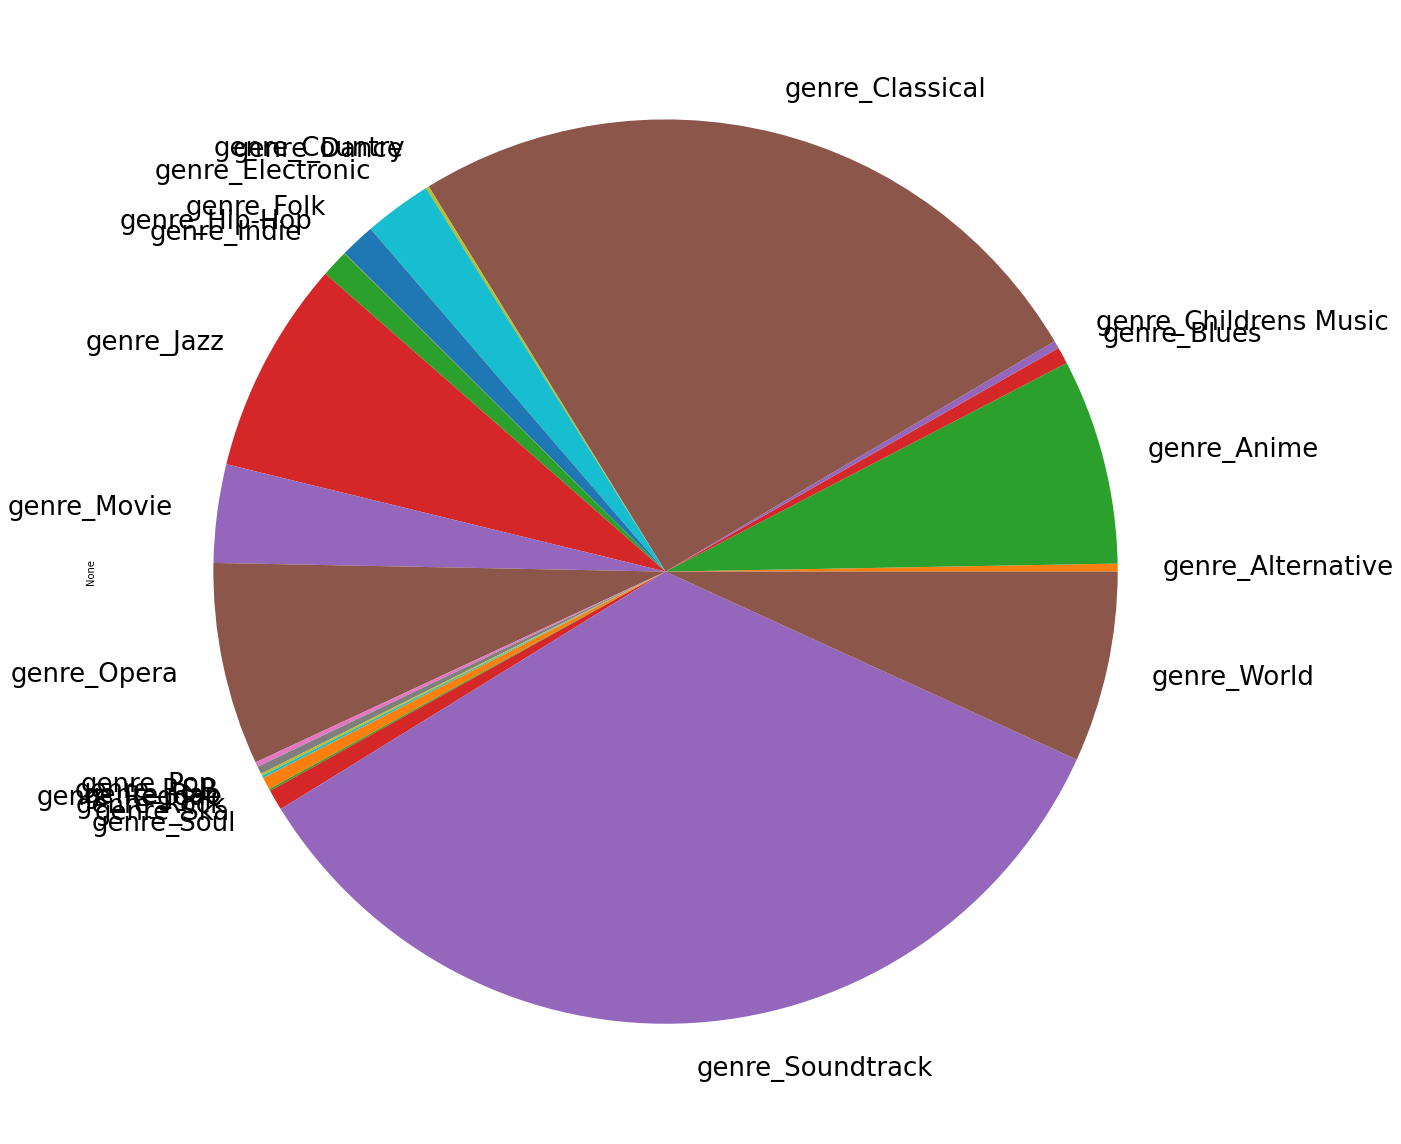

In [90]:
c4g = c4.drop(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'target'],axis=1)
c4gfig = c4g.mean().plot(kind='pie', figsize=(20, 16), fontsize=26).get_figure()
c4gfig.savefig('c4_pie_genre.png')